<a href="https://colab.research.google.com/github/Skvorok/netology_pyda/blob/master/Diploma_of_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Задание № 1.**

Загрузить файл hr.csv.


In [1]:
import platform
if platform.system() == 'Linux':
  from google.colab import drive
  drive.mount('/content/drive')
  trajectory = '/content/drive/My Drive/Colab Notebooks/'
else:
  trajectory = ''
    
    
import pandas as pd
data_file = pd.read_csv(trajectory+'HR.csv')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
data_file

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
data_file.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

**Задание № 2.**

Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, среднее отклонение).


In [4]:
# Рассчет основных статистических значений для переменных data_file: среднее, медиана (50%), мин\макс, среднее отклонение.
data_file.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# Рассчет моды для переменных data_file:
for x in data_file:
    if x not in ['sales', 'salary']:
        data_file[x].dropna()
        print(f'{x}: \nмода - {data_file[x].mode()[0]}\n') 

satisfaction_level: 
мода - 0.1

last_evaluation: 
мода - 0.55

number_project: 
мода - 4

average_montly_hours: 
мода - 135

time_spend_company: 
мода - 3

Work_accident: 
мода - 0

left: 
мода - 0

promotion_last_5years: 
мода - 0



**Задание № 3.**

Рассчитать и визуализировать корреляционную матрицу для переменных.

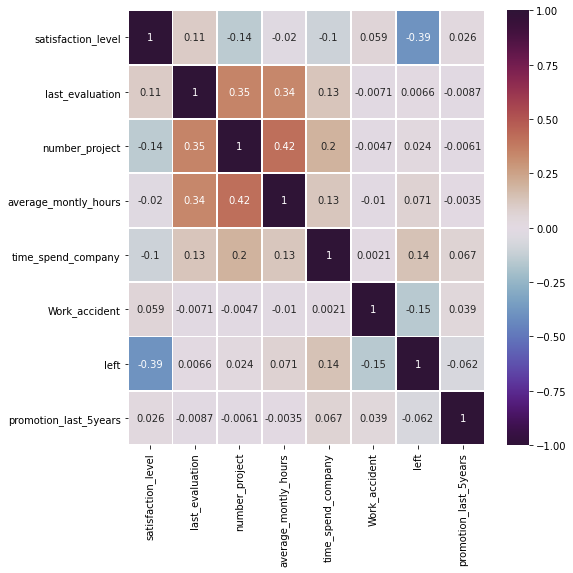

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data_file.corr(), cmap = 'twilight_shifted', annot = True,  vmin = -1, vmax = 1, linewidths = 0.8)
plt.gcf().set_size_inches(8, 8)

Вывод: согласно корреляционной матрице, можно заметить наличие явной отрицательной корреляции между параметрами 'left' и 'satisfaction_level', что логично: чем меньше удовлетворён сотрудник условиями труда, тем скорее он уволится. Так же видна взаимосвязь между параметрами 'average_monthly_hours' и 'number_project',  что позволяет сделать предположение о том, что заинтересованность в работе зависит от проекта, которым занят сотрудник.

**Задание № 4.**

Визуализировать несколько взаимосвязей между переменными.

In [7]:
data_file.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

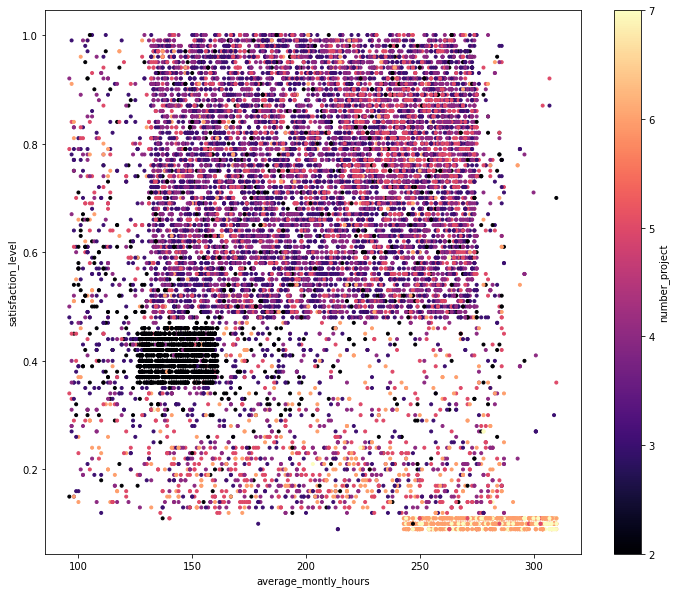

In [8]:
# Визуализация взаимосвязи по параметрам "number_project" и "average_montly_hours" (между проектом и затраченными среднемесячными часами работы).
import matplotlib.pyplot as plt
plt.scatter(data_file['average_montly_hours'],
            data_file['satisfaction_level'],
            c = data_file['number_project'],
            marker = '.',
            cmap = 'magma')
plt.gcf().set_size_inches(12, 10)
plt.xlabel('average_montly_hours')
plt.ylabel('satisfaction_level')
plt.colorbar().set_label(label = 'number_project')


Вывод: данный график показывает нам взаимосвязь между параметрами "number_project" и "average_montly_hours". Заметны две четко сформированные группы: в чёрном квадрате (проект № 2) и группа в оранжевом прямоугольнике (проект № 6). Т.е. коллектив сотрудников, занятый проектом № 6 затрачивает на его реализацию от 240 до 330 часов в месяц, что влияет на критерий по шкале удовлетворенности, а группа проекта № 2, затрачивает  меньшее количество часов на его выполнение в среднем за месяц, соответственно и уровень удовлетворения от работы становится, в этом случае, выше. 

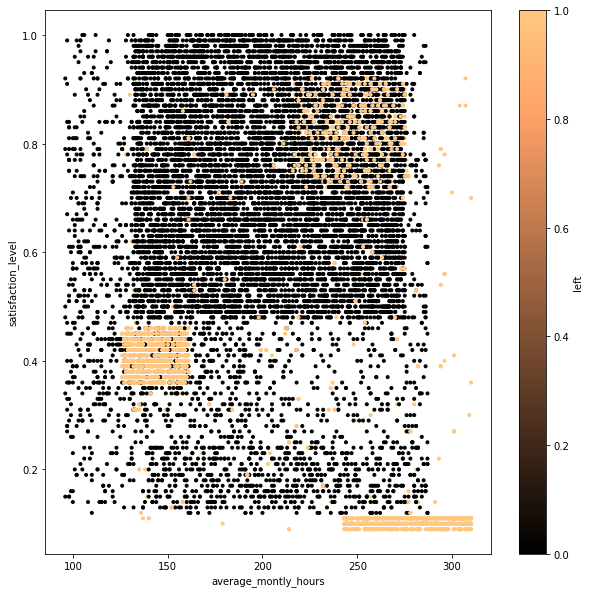

In [9]:
# Визуализация взаимосвязи между параметрами "satisfaction_level" и "left" (между уровнем удовлетворенности и увольнением).
plt.scatter(data_file['average_montly_hours'],
            data_file['satisfaction_level'],
            c = data_file['left'],
            marker = '.',
            cmap = 'copper')
plt.gcf().set_size_inches(10, 10)
plt.xlabel('average_montly_hours')
plt.ylabel('satisfaction_level')
plt.colorbar().set_label(label = 'left')

Вывод: представленный график показывает взаимосвязь между параметрами "satisfaction_level" и "left" (между уровнем удовлетворенности и увольнением). Наблюдаются три сформированные группы желтого цвета, что говорит о факте увольнения сотрудников. Однако, сложно здесь однозначно выявить связь между уровнем удовлетворения и увольняющимися, поскольку и те, кто работают достаточное количество времени в месяц, и сотрудники, перерабатывающие среднемесячную норму имеют разные показатели по шкале удоволетворения. Значит, мы не может утвердительно сказать, что увольнение напрямую связано со степенью удовлетворенности от работы, т. о. есть и другие влияющие факторы. 

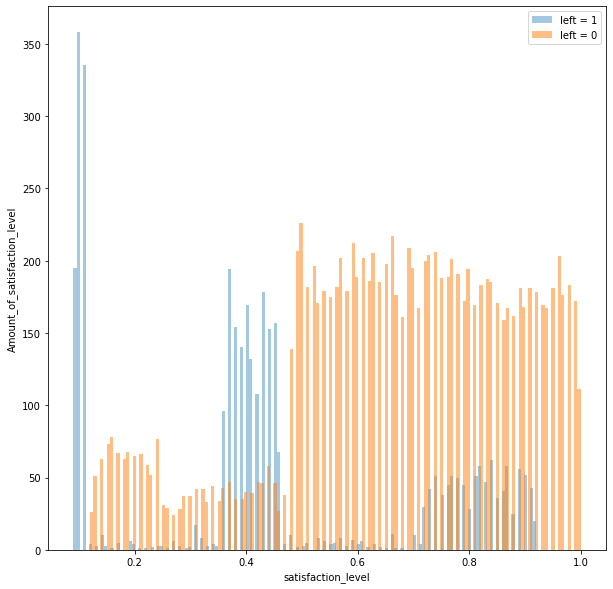

In [10]:
# Визуализация в формате гистограммы по параметру "satisfaction_level" (уровень удовлетворения сотрудников).
plt.hist(data_file['satisfaction_level'][data_file['left'] == 1], label = 'left = 1', alpha = 0.4, bins = 150)
plt.hist(data_file['satisfaction_level'][data_file['left'] == 0], label = 'left = 0', alpha = 0.5, bins = 150)
plt.gcf().set_size_inches(10, 10)
plt.xlabel('satisfaction_level')
plt.ylabel('Amount_of_satisfaction_level')
plt.legend()

Вывод: данная гистограмма наглядно показывает нам уровень удовлетворенности сотрудников. Голубым цветом отмечены уволившиеся, желтым - сотрудники, оставшиеся работать в фирме. Мы видим, что уровень удовлетворения ушеших из компании имеет разные величины, можно предположить, что частые увольнения сотрудников из компании связаны с опредленными проектами (например, проект № 2 и проект № 6). Почему такое возможно?  - на точечном графике, визуализирующем связь между удовлетворением от работы и среднемесячной нормой труда, заметны очень чёткие границы областей уровня удовлетворённости, что наводит на размышления о жёсткой формальности реализации проектов. 

**Задание № 5.**

С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [11]:
# 1) Взаимосвязь между параметрами "time_spend_company" и "left" с использованием t-test.
# Нулевая гипотеза: уволившиеся сотрудники проработали в компании столько же времени, сколько и в среднем по выборке. 
from scipy import stats
p_value = stats.ttest_1samp(data_file['time_spend_company'][data_file['left'] == 1],
                        data_file['time_spend_company'].mean())[1]
print(f'P-value гипотезы, что уволившиеся сотрудники проработали в компании столько же времени, \n сколько и в среднем по выборке равно {p_value}.')


P-value гипотезы, что уволившиеся сотрудники проработали в компании столько же времени, 
 сколько и в среднем по выборке равно 2.518024251375598e-110.


Вывод: нулевая гипотеза не подтвердилась, потому что значение p_value значительно ниже стандартной alpha-ошибки (0.05).

In [12]:
# 2) Взаимосвязь между параметрами "satisfaction_level" и 'salary" c использованием t-test.
# Нулевая гипотеза: уровень удовлетворения в компании у сотрудников с высокой зарплатой, такой же как и в среднем по всей выборке. 
p_value = stats.ttest_1samp(data_file['satisfaction_level'][data_file['salary'] == 'high'],
                        data_file['satisfaction_level'].mean())[1]
print(f'P-value гипотезы, что уровень удовлетворения в компании у сотрудников с высокой зарплатой, \n такой же как и в среднем по всей выборке равно {p_value}.')


P-value гипотезы, что уровень удовлетворения в компании у сотрудников с высокой зарплатой, 
 такой же как и в среднем по всей выборке равно 0.00013974368695866474.


Вывод: нулевая гипотеза не подтверждается, поскольку значение p_value ниже, чем  уровень стандартной alpha-ошибки (0.05), значит степень удовлетворения сотрудников с высокой заработной платой не соответствует степени удовлетворения всех остальных работников компании. 

In [13]:
# 3) Взаимосвязь между параметрами "last_evaluation" и "work_accident" c использованием t-test.
# Нулевая гипотеза: карьерное повышение наблюдается у сотрудников без рабочих инцидентов, так же как и в среднем по всей выборке.  
p_value = stats.ttest_1samp(data_file['last_evaluation'][data_file['Work_accident'] == 0],
                        data_file['last_evaluation'].mean())[1]
print(f'P-value гипотезы, что карьерное повышение наблюдается у сотрудников без рабочих инцидентов, \n такой же как и в среднем по всей выборке равно {p_value}.')


P-value гипотезы, что карьерное повышение наблюдается у сотрудников без рабочих инцидентов, 
 такой же как и в среднем по всей выборке равно 0.7418289237886505.


Вывод: нулевая гипотеза подтвердилась, поскольку p_value равно 0.74, что намного больше стандартной alpha-ошибки (0.05), т.е.карьерное повышение предлагают тем сотрудникам, в корпоративной истории которых нет компрометирующих инцидентов и данное явление распространяется и на всю выборку.

In [14]:
# Взаимосвязь между параметрами "last_evaluation" и "work_accident" c использованием двухвыборочного t-критерия для независимых выборок. 
# Нулевая гипотеза: карьерное повышение наблюдается у сотрудников без рабочих инцидентов, так же как и у сотрудников с рабочими инцидентами. 
p_value = stats.ttest_ind(data_file['last_evaluation'][data_file['Work_accident'] == 0],
                        data_file['last_evaluation'][data_file['Work_accident'] == 1])[1]
print(f'P-value гипотезы, что карьерное повышение наблюдается у сотрудников без рабочих инцидентов, \n так же как и у сотрудников с рабочими инцидентами равно {p_value}.')


P-value гипотезы, что карьерное повышение наблюдается у сотрудников без рабочих инцидентов, 
 так же как и у сотрудников с рабочими инцидентами равно 0.38429846201039486.


Вывод: гипотеза о равенстве двух выборок (сотрудники с карьерным ростом при наличии рабочих инцидентов и сотрудники с карьерным ростом, инцидентов у которых не наблюдается) подтверждается, т.к. p-value равно 0.38, что больше стандартной alpha-ошибки (0.05).

**Задание № 6.**

Рассчитать сколько работников работает в каждом департаменте.

In [15]:
data_file.groupby(data_file.sales).count()['salary'].sort_values(ascending = False)

sales
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: salary, dtype: int64

Вывод: данные показывают, что максимальное количество сотрудников находится в отделе продаж (sales), а в управлении (management) -  минимальное.

**Задание № 7.**

Показать распределение сотрудников по зарплатам.

No handles with labels found to put in legend.


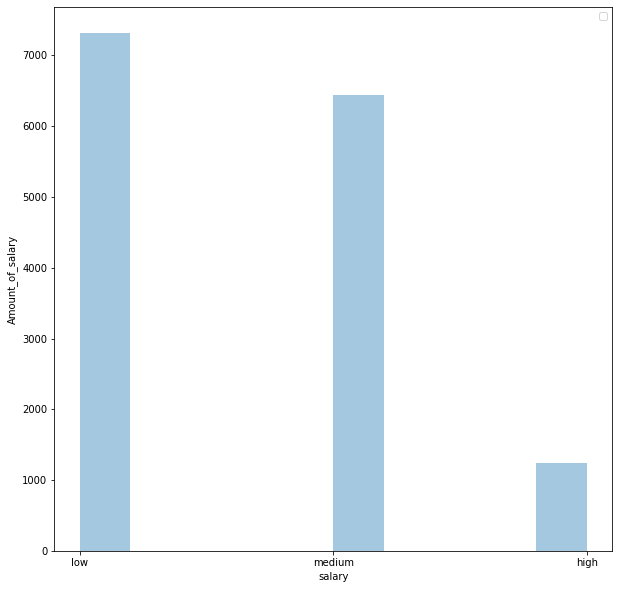

In [16]:
# гистограмма по параметру "salary".
plt.hist(data_file['salary'], alpha = 0.4)
plt.gcf().set_size_inches(10, 10)
plt.xlabel('salary')
plt.ylabel('Amount_of_salary')
plt.legend()

Вывод: подавляющее большинство сотрудников компании имеет или низкий доход, или средний уровень зарплаты, в меньшинстве - высокооплачиваемые. 

**Задание № 8.**

Показать распределение сотрудников по зарплатам совместно с департаментами.

In [17]:
data_file['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

Text(0.5, 1.0, 'Распределение зарплат по отделам')

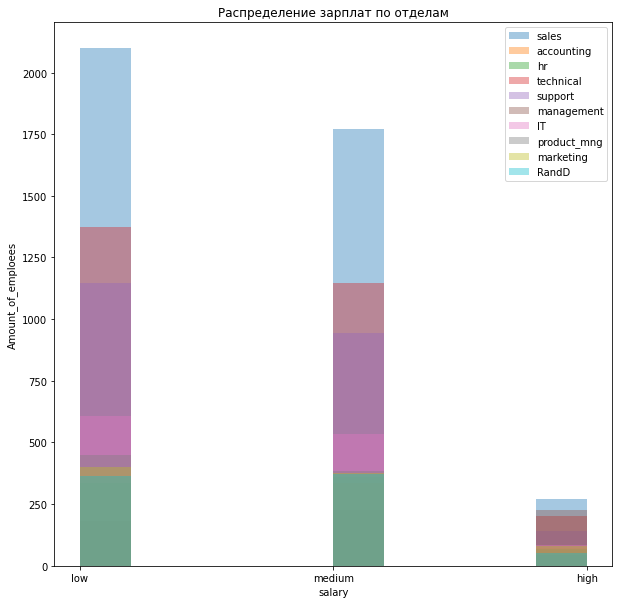

In [18]:
for x in data_file['sales'].unique():
  plt.hist(data_file['salary'][data_file['sales'] == x], stacked = True, alpha = 0.4, label = x)
plt.gcf().set_size_inches(10, 10)
plt.xlabel('salary')
plt.ylabel('Amount_of_emploees')
plt.legend()
plt.title('Распределение зарплат по отделам')

**Задание № 9.**

Сколько сотрудников покинули компанию.

In [19]:
print(f"Компанию покинуло {data_file['left'][data_file['left'] == 1].count()} сотрудников.")

Компанию покинуло 3571 сотрудников.


**Задание № 10.**

Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

In [20]:
# Взаимосвязь между параметрами "time_spend_company" и "left" c использованием двухвыборочного t-критерия для независимых выборок. 
# Нулевая гипотеза: в среднем, время, проведенное в компании у оставшихся сотрудников соответствует проведенному времени уволившихся.
p_value = stats.ttest_ind(data_file['time_spend_company'][data_file['left'] == 0],
                        data_file['time_spend_company'][data_file['left'] == 1])[1]
print(p_value)
print(f'P-value гипотезы о том, что, в среднем, время, проведенное в компании у оставшихся сотрудников соответствует \n проведенному времени уволившихся равно {p_value}.')


4.207680457692835e-71
P-value гипотезы о том, что, в среднем, время, проведенное в компании у оставшихся сотрудников соответствует 
 проведенному времени уволившихся равно 4.207680457692835e-71.


In [21]:
# ДВУХВЫБОРОЧНЫЙ t-КРИТЕРИЙ ДЛЯ ДВУХ НЕЗАВИСИМЫХ ВЫБОРОК.  
# Т.к. параметры 'sales' и 'salary' явялются категориальными, (а OHE мы не проходили на курсе) то гипотезы будут сравниваться без них.
for x in data_file:
  if x in ['sales', 'salary']:
    continue
  # print(data_file[x])
  p_value = stats.ttest_ind(data_file[str(x)][data_file['left'] == 0], data_file[str(x)][data_file['left'] == 1])[1]
  # print(p_value)
  print(f'P-value гипотезы о том, что, значение {x} у оставшихся сотрудников соответствует \n значению {x} уволившихся равно {p_value}.\n')


P-value гипотезы о том, что, значение satisfaction_level у оставшихся сотрудников соответствует 
 значению satisfaction_level уволившихся равно 0.0.

P-value гипотезы о том, что, значение last_evaluation у оставшихся сотрудников соответствует 
 значению last_evaluation уволившихся равно 0.4212701963735056.

P-value гипотезы о том, что, значение number_project у оставшихся сотрудников соответствует 
 значению number_project уволившихся равно 0.0035752138709418788.

P-value гипотезы о том, что, значение average_montly_hours у оставшихся сотрудников соответствует 
 значению average_montly_hours уволившихся равно 2.3113035567540143e-18.

P-value гипотезы о том, что, значение time_spend_company у оставшихся сотрудников соответствует 
 значению time_spend_company уволившихся равно 4.207680457692835e-71.

P-value гипотезы о том, что, значение Work_accident у оставшихся сотрудников соответствует 
 значению Work_accident уволившихся равно 6.613049400453939e-81.

P-value гипотезы о том, что, зна

In [23]:
# ОДНОВЫБОРОЧНЫЙ t-КРИТЕРИЙ.
# Т.к. параметры 'sales' и 'salary' явялются категориальными, (а OHE мы не проходили на курсе) то гипотезы будут сравниваться без них.
for x in data_file:
  if x in ['salary', 'sales']:
    continue
  # print(data_file[x])
  p_value = stats.ttest_1samp(data_file[str(x)][data_file['left'] == 1], data_file[str(x)].mean())[1]
  # print(p_value)
  print(f'P-value гипотезы о том, что, значение {x} уволившихся сотрудников соответствует \n значению {x} в среднем по всей выборке равно {p_value}.\n')


P-value гипотезы о том, что, значение satisfaction_level уволившихся сотрудников соответствует 
 значению satisfaction_level в среднем по всей выборке равно 9.012781195378076e-279.

P-value гипотезы о том, что, значение last_evaluation уволившихся сотрудников соответствует 
 значению last_evaluation в среднем по всей выборке равно 0.5433010700614106.

P-value гипотезы о том, что, значение number_project уволившихся сотрудников соответствует 
 значению number_project в среднем по всей выборке равно 0.08482128282514263.

P-value гипотезы о том, что, значение average_montly_hours уволившихся сотрудников соответствует 
 значению average_montly_hours в среднем по всей выборке равно 5.598760530139529e-10.

P-value гипотезы о том, что, значение time_spend_company уволившихся сотрудников соответствует 
 значению time_spend_company в среднем по всей выборке равно 2.518024251375598e-110.

P-value гипотезы о том, что, значение Work_accident уволившихся сотрудников соответствует 
 значению Work_ac

Вывод: выявлены две подтвержденные основные гипотезы, при стандартной alpha-ошибке 0.05, о том, что увольнения сотрудников связаны с последними повышениями (p-value 0.5433) 
и конкретными проектами (p-value 0.0848), которые они реализовывали. 
Гипотеза с проектами (проект № 2 и проект № 6) была наглядно представлена визуализацией, где выделялись чётко обозначенные области уволенных, совпадающие с областями проектов, что подтвердилось теcтированием.


**Задание № 11.**

Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете